## Import statements

In [1]:
from Scripte.korpus import Korpus
from Scripte.settings import Settings

import json
import re
import string
import spacy

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from tqdm.notebook import tqdm
from functools import reduce
from pathlib import Path
from datetime import datetime
from collections import Counter

from spacy.lang.de import German

In [2]:
nlp = spacy.load("de_core_news_lg") # oder md  oder lg  wenn heruntergeladen

## Functions

In [3]:
def _convert_text(text:str) -> str:
    replacements = [(r"http.+?\s", " "), (r"([a-z])([A-Z])", r"\1 \2"), (r"", ""), 
                    (r"", ""), (r"\*{2,}", ""), ("_+", ""), ]
    for old, new in reversed(replacements):
        text = text.replace(old, new)
    return _convert_entities(text)

def _convert_entities(text:str) -> str:
    doc = nlp(text)
    for entity in reversed(doc.ents):
        text = text[:entity.start_char] + entity.label_ + text[entity.end_char:]
    return text
    

def _convert_wordcount(number: str) -> int:
    return int(number.replace(".", ""))

def _convert_release(date:str):
    return datetime.strptime(date.strip(), "%d.%m.%Y")
 
def old_create_df(path, gender):
    data = reduce(lambda a, b: a.append(b, ignore_index= True), tqdm([create_part(x) for x in path]))
    data["gender"] = gender
    return data

def create_df(path, gender, genre):
    data = pd.concat([create_part(x) for x in tqdm(path)], ignore_index=True)
    data["gender"] = gender
    data["genre"] = genre
    return data

def contains_words(string : str, words) -> bool:
    return any(x in string for x in words)

def create_part(file) -> pd.DataFrame:
    start = json.load(open(file))
    x = pd.DataFrame.from_dict(start["chapters"], orient= "index", columns=["text", "wordcount"])
    x["text"] = x["text"].apply(_convert_text)
    x["wordcount"] = x["wordcount"].apply(_convert_wordcount)
    x["novel"] = re.sub(r"\W", " ", start["title"])
    x["release"] = _convert_release(start["release"])
    return x 
    

### Korpus aufbauen

In [7]:
krimi_W = [x for x in Path("./json/krimis/W").glob('**/*') if x.is_file() if x.suffix == ".json"]
krimi_M = [x for x in Path("./json/krimis/M").glob('**/*') if x.is_file() if x.suffix == ".json"]
#horror
hor_W= [x for x in Path("./json/horror/W").glob('**/*') if x.is_file() if x.suffix == ".json"]
hor_M= [x for x in Path("./json/horror/M").glob('**/*') if x.is_file() if x.suffix == ".json"]
#abenteuer 
aben_W= [x for x in Path("./json/abenteuer/W").glob('**/*') if x.is_file() if x.suffix == ".json"]
aben_M= [x for x in Path("./json/abenteuer/M").glob('**/*') if x.is_file() if x.suffix == ".json"]

#combined
json_M = krimi_M + hor_M + aben_M
json_W = krimi_W + hor_W + aben_W
print(krimi_M)

[WindowsPath('json/krimis/M/Blutsfeder.json'), WindowsPath('json/krimis/M/Crossed-Arrows-Verschraenkte-Pfeile.json'), WindowsPath('json/krimis/M/Das-Geheimnis-von-Silver-City.json'), WindowsPath('json/krimis/M/Das-Geisterschiff.json'), WindowsPath('json/krimis/M/Das-Geschaeft.json'), WindowsPath('json/krimis/M/Das-Mantra-fuer-Blau.json'), WindowsPath('json/krimis/M/Der-Detektiv-und-die-Fluechtlinge.json'), WindowsPath('json/krimis/M/Der-Pate-von-Sankt-Petersburg.json'), WindowsPath('json/krimis/M/Detektei-X.json'), WindowsPath('json/krimis/M/Die-Beine-des-Victor-Vervodin.json'), WindowsPath('json/krimis/M/Die-Biene.json'), WindowsPath('json/krimis/M/Eine-letzte-Kugel.json'), WindowsPath('json/krimis/M/Einmal-zurueck-und-wieder-zurueck-bitte.json'), WindowsPath('json/krimis/M/Equus-Carnifex.json'), WindowsPath('json/krimis/M/Goldrausch.json'), WindowsPath('json/krimis/M/Himmelstraum.json'), WindowsPath('json/krimis/M/Hoehenrausch.json'), WindowsPath('json/krimis/M/IOSC-Duologie-das-Preq

### Diese Schritte brauchen eine Weile. Wenn ihr sie einmal durch habt, könnt ihr unten CSV save/ load verwenden 

In [8]:
data_krimi_M = create_df(krimi_M,"M", "krimi")


  0%|          | 0/31 [00:00<?, ?it/s]

In [9]:
data_krimi_W = create_df(krimi_W,"W","krimi")


  0%|          | 0/90 [00:00<?, ?it/s]

In [10]:
data_hor_M = create_df(hor_M, "M", "horror")
data_hor_W = create_df(hor_W,"W","horror")

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [18]:
data_aben_M = create_df(aben_M, "M", "abenteuer")
data_aben_W = create_df(aben_W,"W","abenteuer")

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

In [19]:
data_krimi_full = pd.concat([data_krimi_M, data_krimi_W],ignore_index=True)
data_aben_full = pd.concat([data_aben_M, data_aben_W],ignore_index=True)
data_hor_full = pd.concat([data_hor_M, data_hor_W],ignore_index=True)

## Summen der Wörter

## load and save from csv


In [20]:
data_krimi_full.to_csv("csv_data_krimi_full.csv", sep ="|")
data_aben_full.to_csv("csv_data_aben_full.csv", sep="|")
data_hor_full.to_csv("csv_data_hor_full.csv",sep="|")

In [21]:
data_krimi_full= pd.read_csv("csv_data_krimi_full.csv", sep ="|")
data_aben_full= pd.read_csv("csv_data_aben_full.csv", sep="|")
data_hor_full = pd.read_csv("csv_data_hor_full.csv",sep="|")

## build from csv files all permutations

In [22]:
data_krimi_M = data_krimi_full.loc[data_krimi_full["gender"] == "M"]
data_krimi_W = data_krimi_full.loc[data_krimi_full["gender"] == "W"]
data_aben_M = data_aben_full.loc[data_aben_full["gender"] == "M"]
data_aben_W = data_aben_full.loc[data_aben_full["gender"] == "W"]
data_hor_M = data_hor_full.loc[data_hor_full["gender"] == "M"]
data_hor_W = data_hor_full.loc[data_hor_full["gender"] == "W"]

# full gender views

data_all_M = pd.concat([data_krimi_M, data_aben_M, data_hor_M], ignore_index=True)
data_all_W = pd.concat([data_krimi_W, data_hor_W, data_aben_W], ignore_index=True)

data_all = pd.concat([data_krimi_full, data_aben_full, data_hor_full], ignore_index=True)

# Analyse und Berechnung

## Vorbereitung

In [23]:
joined_text_krimi_M = data_krimi_M.groupby('novel')['text'].apply(' '.join)
joined_text_krimi_W = data_krimi_W.groupby('novel')['text'].apply(' '.join)
joined_text_krimi_full = pd.concat([joined_text_krimi_M,joined_text_krimi_W])

In [24]:
joined_text_aben_W = data_aben_W.groupby('novel')['text'].apply(' '.join)
joined_text_aben_M = data_aben_M.groupby('novel')['text'].apply(' '.join)
joined_text_aben_full = pd.concat([joined_text_aben_M, joined_text_aben_W])

joined_text_hor_W = data_hor_W.groupby('novel')['text'].apply(' '.join)
joined_text_hor_M = data_hor_M.groupby('novel')['text'].apply(' '.join)
joined_text_hor_full = data_hor_full.groupby('novel')["text"].apply(' '.join)

joined_text_M_full = pd.concat([joined_text_krimi_M,  joined_text_aben_M]) #joined_text_hor_M,
joined_text_W_full = pd.concat([joined_text_krimi_W,  joined_text_aben_W])#joined_text_hor_W,

In [25]:
joined_text_all = data_all.groupby('novel')['text'].apply(' '.join)


## Dieser Schritt braucht etwas!

In [26]:
brut_list = 'brutal schlagen schlug mord misshandeln vergewaltigen überfall tod töten tot treten tritt trat verfolgen hart extrem attacke angriff angreifen metzeln reißen missbrauch zerstören prügel rücksichtslos qual quälen blut griff gewalt tat härte diktator krieg schlacht anschlag schläge terror folter killer teulisch gemein brechen bombe sadistisch erbarmungslos barbarisch knochen verletzen roh grob kampf waffen messer knüppel stoßen lust sexuell diebstahl vandalismus amok belästigen mobbing brand demütigen erpressen nötigung rassismus sabotage stalker hass psychisch einschüchtern entführung beleidigen schimpfen schrei ohrenbetäubend betäubung drogen spritzen kämpfen boxen knöchel schlitzen brechen gedärme teufel dämon bestie schreck hexe kriminalität kriminell liste böse prositution schänden schand entblößen entstellen pervers mafia bosheit fleischwunde gebeine skelett gerippe meucheln umbringen auslöschen kannibale sterben pistole gewehr klinge cutter verbrecher dieb straftäter assassine vergehen entehren unterwerfen entmenscht genitalien faust attentat säge'

brut_final = [token.lemma_ for token in nlp(brut_list)]

def get_brut_ratio(series)-> pd.DataFrame:
    results = []
    for novel, text in series.items():
        if len(text)> nlp.max_length:
            for x in _get_results(novel,text):
                results.append(x)
                print(f"LOG: finished {novel}")
        else:
            results.append([novel]+calc_data(text))
            print(f"LOG: finished {novel}")
        #results.append([novel, brut_sum, brut_types, total_words, percentage])   
    df = pd.DataFrame(results, columns=['novel', 'brut_sum', 'brut_type', 'Total Words', 'Percentage'])

    return df

def _get_results(novel:str, text:str):
    results = []
    chunks = [text[i:i+nlp.max_length] for i in range(0, len(text), nlp.max_length)]
    for i, chunk in enumerate(chunks):
        str_ = f"{novel}_{i}"
        results.append([str_]+ calc_data(chunk))
    return results

def calc_data(text): 
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.lemma_ != "--"]
    count_part = Counter([lemma for lemma in lemmas if lemma in brut_final])
    brut_sum = sum(count_part.values())
    brut_types = len(count_part)
    total_words = len(lemmas)
    percentage = (brut_sum / total_words) * 100
                       
    return [brut_sum, brut_types, total_words, percentage]


# Dies hier wird weiter bearbeitet!

In [35]:
# Set max_length according to your PC, the higher, the more RAM is required 100000 ~~ 1 GB
nlp.max_length = 800000

# Choose those you want to view/compare/plot later, results in DFs
data_comp1 = get_brut_ratio(joined_text_hor_W)
data_comp1["field"] = "hor_W"
data_comp2 = get_brut_ratio(joined_text_hor_M)
data_comp2["field"] = "hor_M"

data_comp3 = get_brut_ratio(joined_text_aben_W)
data_comp3["field"] = "aben_W"
data_comp4 = get_brut_ratio(joined_text_aben_M)
data_comp4["field"] = "aben_M"

data_comp5 = get_brut_ratio(joined_text_krimi_W)
data_comp5["field"] = "krimi_W"
data_comp6 = get_brut_ratio(joined_text_krimi_M)
data_comp6["field"] = "krimi_M"


LOG: finished 43 Stunden
LOG: finished 7 Tage Wahnsinn
LOG: finished Aloha From Hell
LOG: finished Am Ende des Tages
LOG: finished Amusement Park
LOG: finished Another Fear
LOG: finished Archiviert ZOE   DAS LEBEN DES SCHATTEN  BAND I  
LOG: finished Archiviert ZOE   DAS LEBEN DES SCHATTEN  BAND I  
LOG: finished Archiviert ZOE   DAS VERMÄCHTNIS DER ERBEN  BAND II  
LOG: finished Archiviert ZOE   DAS VERMÄCHTNIS DER ERBEN  BAND II  
LOG: finished Archiviert ZOE   DAS VERMÄCHTNIS DER ERBEN  BAND II  
LOG: finished Archiviert ZOE   Das Leben der Mörderin   Band I 
LOG: finished Archiviert ZOE   Das Leben der Mörderin   Band II 
LOG: finished Archiviert ZOE   Das Leben der Mörderin   Band II 
LOG: finished Archiviert ZOE   Einhundert Tage   Band III 
LOG: finished Avarus
LOG: finished Bad Boy or good guy 
LOG: finished Because Life doesn t have a Happy End
LOG: finished Bloodlust
LOG: finished Bloody Mary
LOG: finished Blutrot
LOG: finished Blutspiel
LOG: finished Criminal Minds   Die Ges

LOG: finished Wohin der Wind auch weht   Meharos Zauber
LOG: finished Wunder geschehen
LOG: finished Yuus unglaubliche Abenteuer
LOG: finished Yuus unglaubliche Abenteuer
LOG: finished Zeitsplitter in Bronze
LOG: finished Zwischen Himmel und Erde
LOG: finished Zwischen allen Welten
LOG: finished Baldur   Alle Farben der Magie
LOG: finished Baldur   Alle Farben der Magie
LOG: finished Baldur   Alle Farben der Magie
LOG: finished Baldur   Alle Farben der Magie
LOG: finished Baldur   Alle Farben der Magie
LOG: finished Clash of Times
LOG: finished Der Held von Aranor
LOG: finished Der König von Kalaß
LOG: finished Der Zeitzug   Die erste Fahrt des Schaffners
LOG: finished Die Chroniken der sieben Schwerter
LOG: finished Die Geschichte von Lars Zickler
LOG: finished Die Große Liebe im Jugendknast
LOG: finished Die Große Liebe im Jugendknast
LOG: finished Die Höhle
LOG: finished Die Kinder des Windes
LOG: finished Ein Traum 
LOG: finished Fjell   Der Berg der Jomsburg
LOG: finished Gabriel


In [36]:
data_final_hor = pd.concat([data_comp1, data_comp2])
data_final_aben = pd.concat([data_comp3, data_comp4])
data_final_krimi = pd.concat([data_comp5, data_comp6])

In [37]:
data_final_hor.to_csv("csv_analyse_data_hor.csv", sep ="|")
data_final_aben.to_csv("csv_analyse_data_aben.csv", sep ="|")
data_final_krimi.to_csv("csv_analyse_data_.krimi", sep ="|")

In [38]:
data_final_hor = pd.read_csv("csv_analyse_data_hor.csv", sep ="|" )
data_final_aben = pd.read_csv("csv_analyse_data_aben.csv", sep ="|" )
data_final_krimi = pd.read_csv("csv_analyse_data_krimi.csv", sep ="|" )

In [42]:
data_final_krimi



,Unnamed: 0,novel,brut_sum,brut_type,Total Words,Percentage,field
0,0,Albtraum,144,23,19159,0.751605,krimi_W
1,1,Alina,85,19,12850,0.661479,krimi_W
2,2,Aller Anfang ist schwer,72,29,14258,0.504980,krimi_W
3,3,Angel Arbeitstitel,88,23,11685,0.753102,krimi_W
4,4,Anonym,41,15,11066,0.370504,krimi_W
...,...,...,...,...,...,...,...
117,27,Tote Helden,207,37,35750,0.579021,krimi_M
118,28,Tödliche Begegnung,233,36,31566,0.738136,krimi_M
119,29,Unter Verdacht,209,30,21994,0.950259,krimi_M
120,30,Verraten,124,31,15481,0.800982,krimi_M


## Plotting


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# to make sure to not lose data, plots can be saved, make sure you change filename if you use this option
SAVE_FILES = True

subdirectory = Path('plots')
subdirectory.mkdir(parents=True, exist_ok=True)
#FILENAME- CHANGE THIS
plot_name_hor = 'hor.png'
file_path_hor = subdirectory / plot_name_hor

plot_name_aben = 'aben.png'
file_path_aben = subdirectory / plot_name_aben

plot_name_krimi = 'krimi.png'
file_path_krimi = subdirectory / plot_name_krimi

In [45]:
df_hor =  data_final_hor.sort_values('Percentage', ascending=True)
df_aben =  data_final_aben.sort_values('Percentage', ascending=True)
df_krimi =  data_final_krimi.sort_values('Percentage', ascending=True)#DataFrame mit den Anteilen der Adjektive hier einfügen

# Viewing the Data

In [ ]:
sns.set(rc={'figure.figsize':(10, 20)})
sns.barplot(x='Percentage', y='novel', hue='field', data=df)

plt.xlabel('Percentage of Brutal words', fontsize = 25)
plt.ylabel('Novel', fontsize = 25)

highest_percentage = df['Percentage'].max()
lowest_percentage = df['Percentage'].min()
average_percentage = df['Percentage'].mean()

text_highest = f'Highest: {highest_percentage:.2f}%'
text_lowest = f'Lowest: {lowest_percentage:.2f}%'
text_average = f'Average: {average_percentage:.2f}%'

plt.annotate(text_highest, xy=(highest_percentage, len(df)-1), xytext=(10, 0),
             ha='left', va='center', fontsize=20, xycoords='data', textcoords='offset points')
plt.annotate(text_lowest, xy=(lowest_percentage, 0), xytext=(10, 0),
             ha='left', va='center', fontsize=20, xycoords='data', textcoords='offset points')
plt.annotate(text_average, xy=(average_percentage, len(df)//2), xytext=(10, 0),
             ha='left', va='center', fontsize=20, xycoords='data', textcoords='offset points')

if SAVE_FILES: plt.savefig(file_path, dpi= 300, bbox_inches ='tight')

plt.show()

# Comparison plots

C:\Users\simon\AppData\Local\Temp\ipykernel_12988\4162817447.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_hor, x='field', y='Percentage', ci= None)


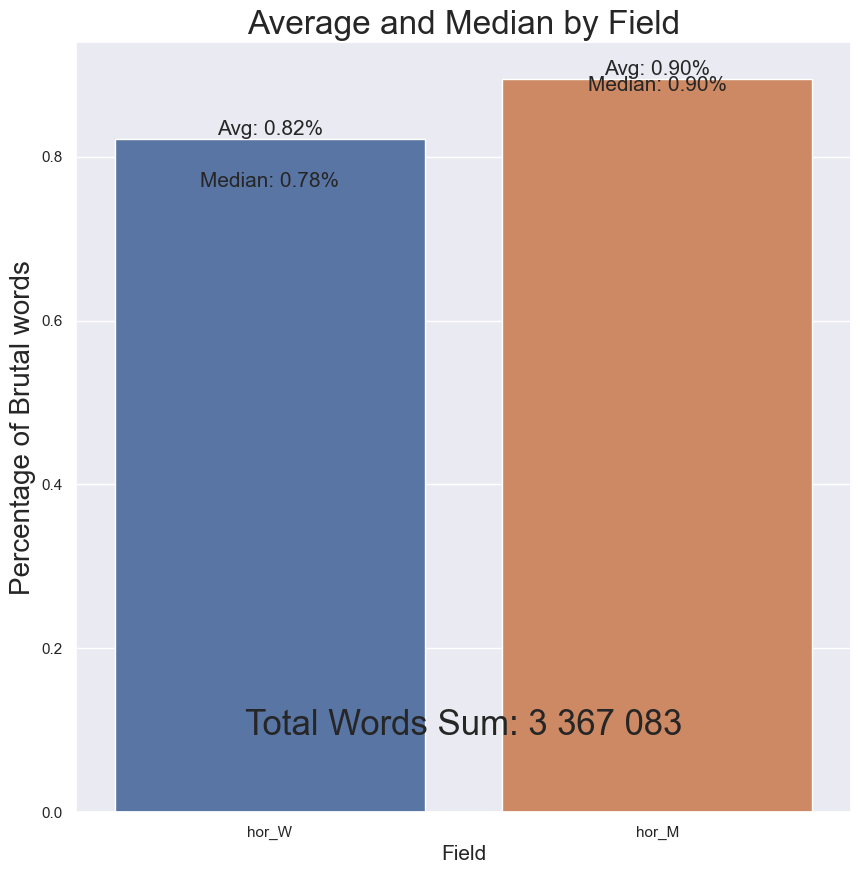

C:\Users\simon\AppData\Local\Temp\ipykernel_12988\4162817447.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aben, x='field', y='Percentage', ci= None)


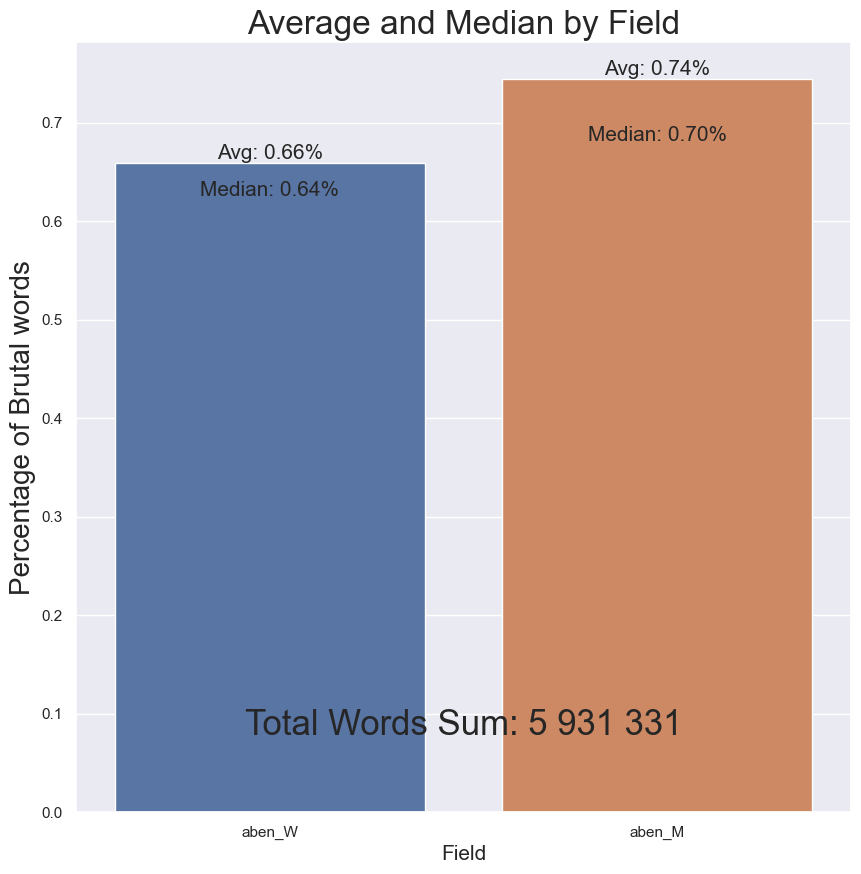

C:\Users\simon\AppData\Local\Temp\ipykernel_12988\4162817447.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_krimi, x='field', y='Percentage', ci= None)


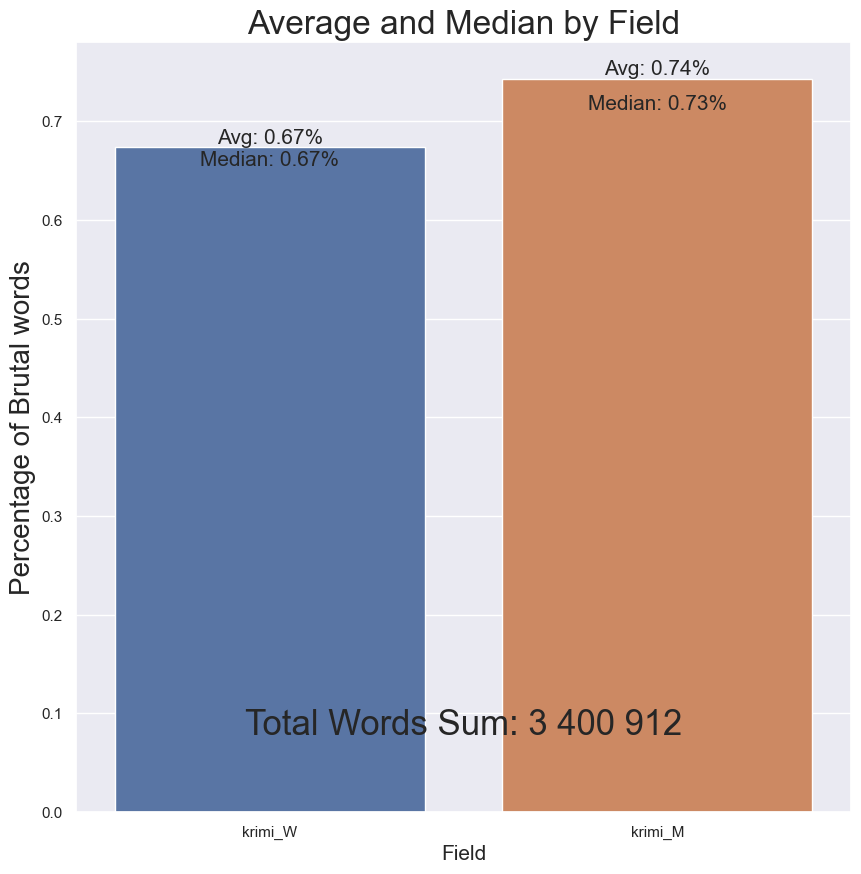

In [46]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(data=df_hor, x='field', y='Percentage', ci= None)

# Calculate and display average and median for each group
average_per_group = df_hor.groupby('field')['Percentage'].mean()
median_per_group = df_hor.groupby('field')['Percentage'].median()
total_words_sum = df_hor['Total Words'].sum()

for i, field in enumerate(df_hor['field'].unique()):
    plt.text(i, average_per_group[field], f'Avg: {average_per_group[field]:.2f}%', ha='center', va='bottom', fontsize=15)
    plt.text(i, median_per_group[field], f'Median: {median_per_group[field]:.2f}%', ha='center', va='top', fontsize=15)

plt.xlabel('Field', fontsize=15)
plt.ylabel('Percentage of Brutal words', fontsize=20)
plt.title('Average and Median by Field', fontsize=24)

plt.text(0.5, 0.1, f"Total Words Sum: {'{:,.0f}'.format(total_words_sum).replace(',', ' ')}",
         ha= "center", transform=plt.gca().transAxes, fontsize=25)
    

if SAVE_FILES: plt.savefig(file_path_hor, dpi= 300, bbox_inches ='tight')

plt.show()

sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(data=df_aben, x='field', y='Percentage', ci= None)

# Calculate and display average and median for each group
average_per_group = df_aben.groupby('field')['Percentage'].mean()
median_per_group = df_aben.groupby('field')['Percentage'].median()
total_words_sum = df_aben['Total Words'].sum()

for i, field in enumerate(df_aben['field'].unique()):
    plt.text(i, average_per_group[field], f'Avg: {average_per_group[field]:.2f}%', ha='center', va='bottom', fontsize=15)
    plt.text(i, median_per_group[field], f'Median: {median_per_group[field]:.2f}%', ha='center', va='top', fontsize=15)

plt.xlabel('Field', fontsize=15)
plt.ylabel('Percentage of Brutal words', fontsize=20)
plt.title('Average and Median by Field', fontsize=24)

plt.text(0.5, 0.1, f"Total Words Sum: {'{:,.0f}'.format(total_words_sum).replace(',', ' ')}",
         ha= "center", transform=plt.gca().transAxes, fontsize=25)
    

if SAVE_FILES: plt.savefig(file_path_aben, dpi= 300, bbox_inches ='tight')

plt.show()

sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(data=df_krimi, x='field', y='Percentage', ci= None)

# Calculate and display average and median for each group
average_per_group = df_krimi.groupby('field')['Percentage'].mean()
median_per_group = df_krimi.groupby('field')['Percentage'].median()
total_words_sum = df_krimi['Total Words'].sum()

for i, field in enumerate(df_krimi['field'].unique()):
    plt.text(i, average_per_group[field], f'Avg: {average_per_group[field]:.2f}%', ha='center', va='bottom', fontsize=15)
    plt.text(i, median_per_group[field], f'Median: {median_per_group[field]:.2f}%', ha='center', va='top', fontsize=15)

plt.xlabel('Field', fontsize=15)
plt.ylabel('Percentage of Brutal words', fontsize=20)
plt.title('Average and Median by Field', fontsize=24)

plt.text(0.5, 0.1, f"Total Words Sum: {'{:,.0f}'.format(total_words_sum).replace(',', ' ')}",
         ha= "center", transform=plt.gca().transAxes, fontsize=25)
    

if SAVE_FILES: plt.savefig(file_path_krimi, dpi= 300, bbox_inches ='tight')

plt.show()

# Brut Types

In [ ]:
overall_avg_brut_type = df['brut_type'].mean()

# Calculate the average of "brut_type" for each unique group in the 'field' column
avg_brut_type_by_field = df.groupby('field')['brut_type'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot to display the overall average and averages by field
plt.bar("Overall", overall_avg_brut_type, label='Overall Average', color='blue')
for field, avg in avg_brut_type_by_field.items():
    plt.bar(field, avg, label=f'Average in {field}', color='orange')

plt.xlabel('Field', fontsize=15)
plt.ylabel('Average of brut_type', fontsize=15)
plt.title('Average of brut_type by Field', fontsize=18)
plt.legend(fontsize=12)

plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Specify the file path relative to the subdirectory and format (e.g., PNG)
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# To save in other formats, change the file extension (e.g., 'average_brut_type.jpg', 'average_brut_type.pdf')

plt.show()

In [50]:
from scipy import stats
df_hor = data_final_hor
df_aben = data_final_aben
df_krimi = data_final_krimi

male_data_hor = df_hor[df_hor['field'] == 'hor_M']['Percentage']
female_data_hor = df_hor[df_hor['field'] == 'hor_W']['Percentage']

male_data_aben = df_aben[df_aben['field'] == 'aben_M']['Percentage']
female_data_aben = df_aben[df_aben['field'] == 'aben_W']['Percentage']

male_data_krimi = df_krimi[df_krimi['field'] == 'krimi_M']['Percentage']
female_data_krimi = df_krimi[df_krimi['field'] == 'krimi_W']['Percentage']

# Durchführung des T-Tests
t_statistic_hor, p_value_hor = stats.ttest_ind(male_data_hor, female_data_hor, equal_var=True)
t_statistic_aben, p_value_aben = stats.ttest_ind(male_data_aben, female_data_aben, equal_var=True)
t_statistic_krimi, p_value_krimi = stats.ttest_ind(male_data_krimi, female_data_krimi, equal_var=True)
# Ausgabe der Testergebnisse
print(f'T-Statistik Horror: {t_statistic_hor}')
print(f'p-Wert Horror: {p_value_hor}')
print(f'T-Statistik Abenteuer: {t_statistic_aben}')
print(f'p-Wert Abenteuer: {p_value_aben}')
print(f'T-Statistik Krimi: {t_statistic_krimi}')
print(f'p-Wert Krimi: {p_value_krimi}')

# Interpretation der Ergebnisse
alpha = 0.05  # Signifikanzniveau
if p_value_hor < alpha:
    print("Der Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren in der Rubrik Horror ist statistisch signifikant.")
else:
    print("Es gibt keinen statistisch signifikanten Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren.")

if p_value_aben < alpha:
    print("Der Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren in der Rubrik Abenteuer ist statistisch signifikant.")
else:
    print("Es gibt keinen statistisch signifikanten Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren.")

if p_value_krimi < alpha:
    print("Der Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren in der Rubrik Krimi ist statistisch signifikant.")
else:
    print("Es gibt keinen statistisch signifikanten Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren.")

T-Statistik Horror: 1.344573060441697
p-Wert Horror: 0.1816333496089395
T-Statistik Abenteuer: 2.0369589456107637
p-Wert Abenteuer: 0.04338936429216668
T-Statistik Krimi: 1.9631704129410246
p-Wert Krimi: 0.05193967646503615
Es gibt keinen statistisch signifikanten Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren.
Der Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren in der Rubrik Abenteuer ist statistisch signifikant.
Es gibt keinen statistisch signifikanten Unterschied im Anteil der brutalen Worte zwischen männlichen und weiblichen Autoren.
